# Uni-Variate Analysis

**Datasets**

**Sales Count and Price Cuts**
*   Sales Count Nowcast (Raw, All Homes)
*   Share of Listings with a Price Cut (Raw, All Homes, Monthly)
*   Median Price Cut ($, Raw, All Homes, Monthly)

**List** **bold text**
*   Percent of Homes Sold Above/Below List (Raw, All Homes, Monthly View) <-- 2 here
*   Median Days to Close (Raw, All Homes, Monthly View)

**NOTE: For all graphs, double click on regions to isolate for data in that particular region.**


## *Imports*

In [ ]:
# Used for data manipulation and analysis
import pandas as pd
# Used for creating visualizations and plots
import plotly.express as px
import plotly.graph_objects as go
# Used for testing distributions
import statsmodels.api as sm

## *Helper functions*

In [ ]:
def unpivot_dataframe(file_path, Metric_value='Metric_value'):
    # read csv
    data_frame = pd.read_csv(file_path)

    # Remove unwanted columns
    data_frame = data_frame.drop(['RegionID', 'SizeRank'], axis=1)

    # Unpivot DataFrame from having date values on columns to rows
    data_frame = data_frame.melt(id_vars=['RegionName','RegionType','StateName'], var_name='Date', value_name=Metric_value)

    # Convert Date field to DateTime type
    data_frame['Date'] = pd.to_datetime(data_frame['Date'])

    # Use interpolation to fill missing values
    data_frame = data_frame.set_index('Date')
    data_frame = data_frame.groupby('RegionName', group_keys=False).apply(lambda x: x.interpolate(method='time'))
    data_frame = data_frame.reset_index()

    # drop only entries with NaN values in the metric column
    return data_frame.dropna(subset=[Metric_value])

def plot_timeseries(df, plot_title, y_col='Metric_value'):
    # Filter the DataFrame for the national level data
    nation_df = df[df['RegionType'] == 'country']

    # Create the scatter plot using Plotly Express with the specified title
    fig = px.scatter(nation_df, x="Date", y=y_col, color="RegionName",
                     hover_data=['RegionName', y_col],
                     title=plot_title + " at National level")

    # Display the national level plot
    fig.show()

    # Filter the DataFrame for the metropolitan level data
    metro_df = df[df['RegionType'] != 'country']

    # Create the scatter plot at metropolitan level
    fig = px.scatter(metro_df, x="Date", y=y_col, color="RegionName",
                     hover_data=['RegionName', y_col, 'StateName'],
                     title=plot_title + " at metropolitan level")

    # Display the metropolitan level plot
    fig.show()

    # aggregate timeseries by state
    state_df = metro_df.groupby(['StateName', 'Date']).mean(numeric_only=True).reset_index()

    # Create the scatter plot at metropolitan level
    fig = px.scatter(state_df, x="Date", y=y_col, color="StateName",
                     hover_data=['StateName', y_col],
                     title=plot_title + " at state level")

    # Display the state level plot
    fig.show()

    # Plot trend, seasonality for national level data

    result=seasonal_decompose(nation_df[y_col], model='multiplicative', period=12)
    result.plot()

## **All Individual Graphs**

In [ ]:
# Provide the root path to this ipynb notebook
root_path = './'

### ***Sales Count Nowcast***

In [ ]:
# Sales Count Nowcast
# The estimated number of unique properties that sold during the month after accounting for the latency between when sales occur and when they are reported.

sales_count_nowcast_path = root_path + "/data/sales_count_nowcast.csv"
sales_count_nowcast_df = unpivot_dataframe(sales_count_nowcast_path)

In [ ]:
# Create a scatter graph of Sales Count Nowcast (Number of unique sold properties for all states)
fig1 = px.scatter(sales_count_nowcast_df, x='Date', y='Metric_value',
                 color = 'RegionName',
                 title='Sales Count from 2008 to 2023',
                 hover_data=['RegionName', 'Metric_value'])
fig1.update_layout(yaxis_title='Number of unique properties that sold during the month')

# Create a line graph of Sales Count Nowcast (Number of unique sold properties for all states)
fig2 = px.line(sales_count_nowcast_df, x='Date', y='Metric_value',
                 color = 'RegionName',
                 title='Sales Count from 2008 to 2023',
                 hover_data=['RegionName', 'Metric_value'])
fig2.update_layout(yaxis_title='Number of unique properties that sold during the month')

fig1.show()
fig2.show()

For fig1, sale count seems to be higher in the summer roughly from June to fall October. (For United States)


*   Cycling pattern
*   Overall upward trend


### ***Share of Listings with a Price Cut***

In [ ]:
# Share of Listings with a Price Cut
# The number of unique properties with a list price at the end of the month that’s less than the list price at the beginning of the month, divided by the number of unique properties with an active listing at some point during the month.
share_of_listings_path = root_path + "/data/share_of_listings_with_a_price_cut.csv"
share_of_listings_df = unpivot_dataframe(share_of_listings_path)

In [ ]:
# Create a scatter graph of Share of Listings with a Price Cut
fig3 = px.scatter(share_of_listings_df, x='Date', y='Metric_value',
                 color = 'RegionName',
                 title='Share of Listings with a Price Cut',
                 hover_data=['RegionName', 'Metric_value'])
fig3.update_layout(yaxis_title='Share of unique properties with a Price Cut (%)')

fig3.show()

Output hidden; open in https://colab.research.google.com to view.

For fig3, the share of listings with a price cut seem to be higher in the summer roughly from June to fall October. (For United States)


*   Cycling pattern
*   Highest in 2022



### ***Median Price Cut***

In [ ]:
# Median Price Cut
# The median price cut for listings in a given region during a given time period, expressed as both dollars ($) and as a percentage (%) of list price.

median_price_cut_path = root_path + "/data/median_price_cut.csv"
median_price_cut_df = unpivot_dataframe(median_price_cut_path)

In [ ]:
# Create a scatter graph of Median Price Cut
fig4 = px.scatter(median_price_cut_df, x='Date', y='Metric_value',
                 color = 'RegionName',
                 title='Median Price Cut',
                 hover_data=['RegionName', 'Metric_value'])
fig4.update_layout(yaxis_title='Median Price Cut for listings in a given region ($)')

fig4.show()

### ***Percent of Homes Sold Above and Below List***

In [ ]:
# Percent of Homes Sold Above List
# Ratio of sales where Sale Price above the final list price; excludes homes sold for exactly the list price.

percent_homes_sold_above_list_path = root_path + "/data/percent_of_homes_sold_above_list.csv"
percent_homes_sold_above_list_df = unpivot_dataframe(percent_homes_sold_above_list_path)

# Percent of Homes Sold Below List
# Ratio of sales where Sale Price below the final list price; excludes homes sold for exactly the list price.

percent_homes_sold_below_list_path = root_path + "/data/percent_of_homes_sold_below_list.csv"
percent_homes_sold_below_list_df = unpivot_dataframe(percent_homes_sold_below_list_path)

In [ ]:
# Create a scatter graph of Sale Price Above the final list price
fig5 = px.scatter(percent_homes_sold_above_list_df, x='Date', y='Metric_value',
                 color = 'RegionName',
                 title='Ratio of sales where Sale Price ABOVE the final list price',
                 hover_data=['RegionName', 'Metric_value'])
fig5.update_layout(yaxis_title='Ratio of sales where Sale Price ABOVE the final list price')

# Create a scatter graph of Sale Price Below the final list price
fig6 = px.scatter(percent_homes_sold_below_list_df, x='Date', y='Metric_value',
                 color = 'RegionName',
                 title='Ratio of sales where Sale Price BELOW the final list price',
                 hover_data=['RegionName', 'Metric_value'])
fig6.update_layout(yaxis_title='Ratio of sales where Sale Price BELOW the final list price')

fig5.show()
fig6.show()

Output hidden; open in https://colab.research.google.com to view.

### ***Median Days to Close***

In [ ]:
# Median Days to Close
# Number of days between the listing going pending and the sale date.

median_days_to_close_path = root_path + "/data/median_days_to_close.csv"
median_days_to_close_df = unpivot_dataframe(median_days_to_close_path)

In [ ]:
# Create a scatter graph of Median Days to Close
fig7 = px.scatter(median_days_to_close_df, x='Date', y='Metric_value',
                 color = 'RegionName',
                 title='Median Days to Close',
                 hover_data=['RegionName', 'Metric_value'])
fig7.update_layout(yaxis_title='Number of days between the listing going pending and the sale date')

fig7.show()

## Testing for Normal Distribution

If data is not normally distributed, the spearman correlation coefficient will be used for further multi-variate analysis.

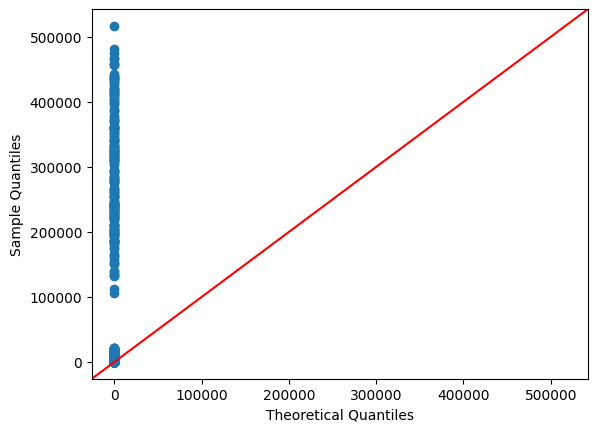

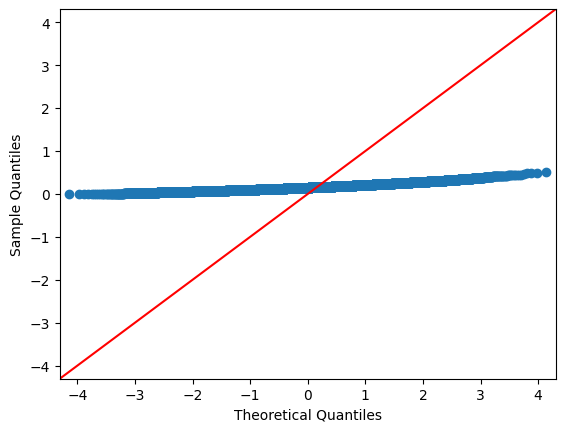

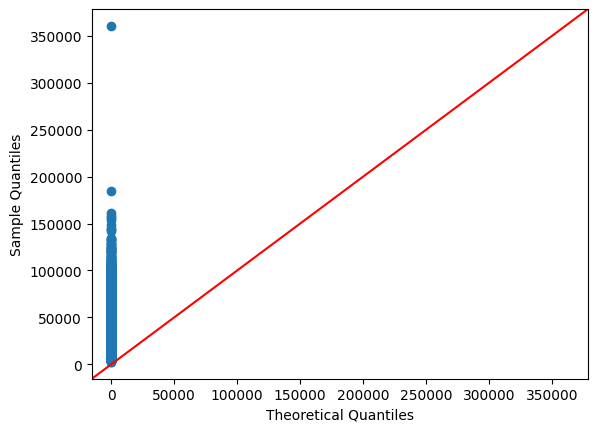

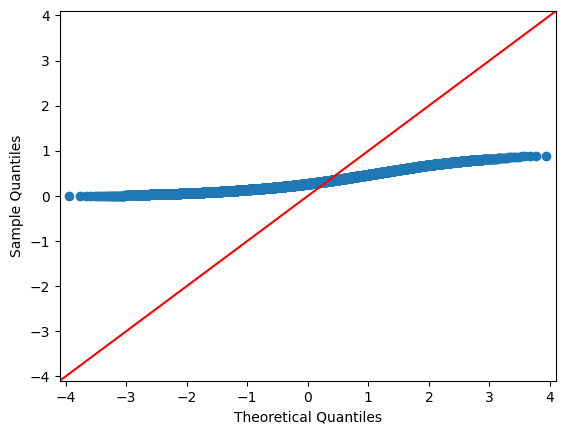

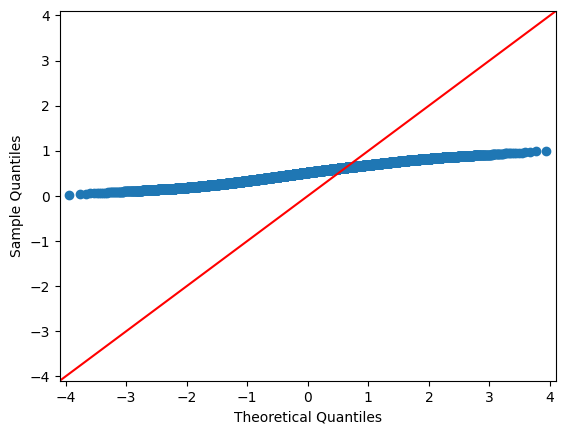

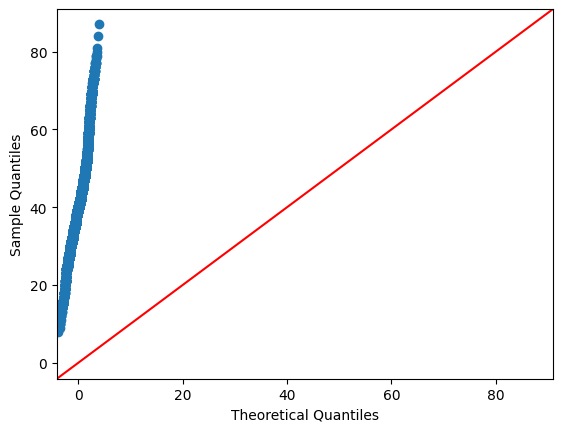

In [ ]:
# Test if data is normally distributed using a Q-Q plot
# If points fall roughly along the straight diagonal line, then data is assumed to be normally distributed

datasets = [sales_count_nowcast_df, share_of_listings_df, median_price_cut_df, percent_homes_sold_above_list_df, percent_homes_sold_below_list_df, median_days_to_close_df]

for each in datasets:
    qq_plot = sm.qqplot(each['Metric_value'], line='45')
    qq_plot.show()

## **Some Interesting Finds**

### ***Median Price Cut and Median Days to Close***

Median Price Cut scatter graph = fig4

Median Days to Close scatter graph = fig7

(For United States)
Generally from looking at these two graphs: The longer it takes for a listing to close, the higher its price cut.

In [ ]:
fig4.show()
fig7.show()

Output hidden; open in https://colab.research.google.com to view.

### **Comparing Sales Count and Sales Inventory**

(For United States)

*   The amount of properies decreased significantly throughout the years
*   Although not as noticeable as the sales inventory line, the Sales Count has increased slightly over the years as the trend seems to show
*   A less properties but more sold



In [ ]:
# Sales Count code from earlier (fig1) modified to only include United States
sales_count_nowcast_df = sales_count_nowcast_df[sales_count_nowcast_df['RegionName'] == 'United States']

fig8 = px.line(sales_count_nowcast_df, x='Date', y='Metric_value',
                 color = 'RegionName',
                 title='Sales Count from 2008 to 2023',
                 hover_data=['RegionName', 'Metric_value'])
fig8.update_layout(yaxis_title='Number of unique properties that sold during the month')

fig8.show()

# changing into a line graph and making it red
file_path = root_path + "/data/for_sale_inventory.csv"
For_Sale_Inventory_df = unpivot_dataframe(file_path)
For_Sale_Inventory_df = For_Sale_Inventory_df[For_Sale_Inventory_df['RegionType']  == 'country']
fig9 = px.line(For_Sale_Inventory_df, x='Date', y='Metric_value', color='RegionName',
                 hover_data=['RegionName', 'Metric_value', 'StateName'],
                 title='For Sale Inventory over the years')
# Change to color red
fig9.update_traces(line_color='red')
fig9.show()

# Combine the two line graphs
comb_fig = go.Figure()
for trace8 in fig8['data']:
    comb_fig.add_trace(trace8)
for trace9 in fig9['data']:
    comb_fig.add_trace(trace9)
comb_fig.update_layout(xaxis_title='Date', yaxis_title='Number of properties')

#comb_fig.show()